In [1]:
import our_gantt_chart as gc
import numpy as np
import pandas as pd
import datetime as dt

from dateutil import parser



import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.text as text

%matplotlib notebook



In [2]:
activities = {}
activities["genmc"] = {"name":"Generate MC", "start":"12/1/2017", "duration":60, "type_of_work":"grid"}
activities["pas"] = {"name":"Write Physics Analysis Note", "start":"2/1/2018", "duration":90, "type_of_work":"writing"}
activities["opt"] = {"name":"Optimize", "start":"genmc", "duration":20, "type_of_work":"code"}
activities["test"] = {"name":"THIS", "start":"4/1/2018", 'end':"7/1/2019", "duration":20, "type_of_work":"code"}

colors = {"grid":"r", 
           "writing":"b",
           "code":"g"}

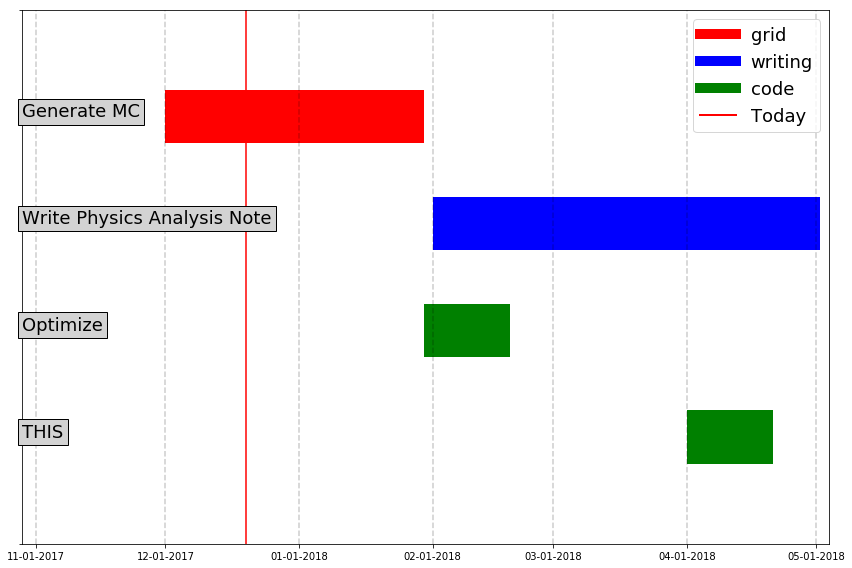

In [3]:
plt.figure(figsize=(12,8))
ax2 = gc.gantt_chart(activities,colors)

In [4]:
date = activities['genmc']['start']
d = gc.is_date(date)
print(d)

2017-12-01 00:00:00


Activity test has both a duration and an end date, but they don't match up!
Duration: 20.00
End-Start: 456.00
<class 'datetime.datetime'>
grid
{'grid': 'r', 'writing': 'b', 'code': 'g'}
<class 'datetime.datetime'>
writing
{'grid': 'r', 'writing': 'b', 'code': 'g'}
<class 'datetime.datetime'>
code
{'grid': 'r', 'writing': 'b', 'code': 'g'}
<class 'datetime.datetime'>
code
{'grid': 'r', 'writing': 'b', 'code': 'g'}
timespan:  156


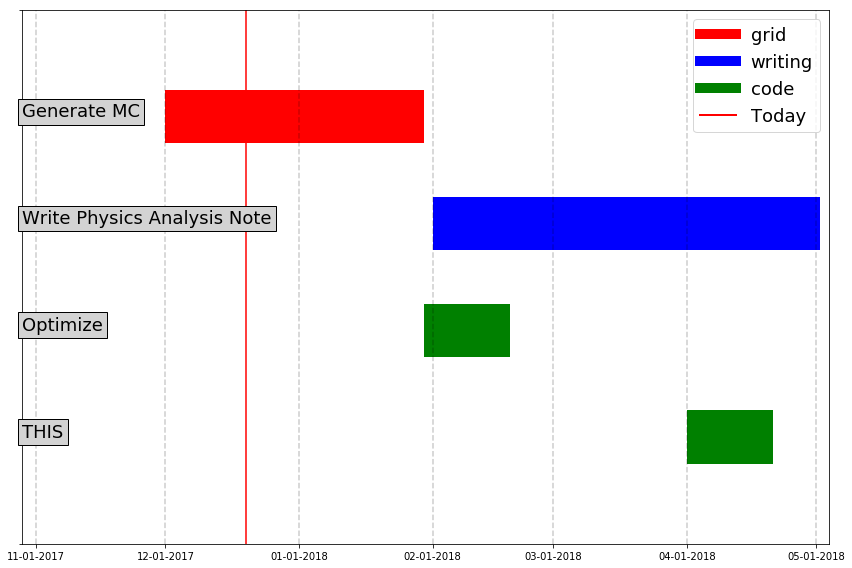

In [5]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook




fig1 = plt.figure(figsize=(12,8))
#ax = fig1.add_subplot(111, aspect='equal')
ax = fig1.add_subplot(1,1,1)

ymax = 10000

datemin = dt.datetime(3000,1,1)
datemax = dt.datetime(1,1,1)

###########################################################
# Validate 
###########################################################
for i,key in enumerate(activities.keys()):
    activity = activities[key]
    akeys = activity.keys()
    if 'start' not in akeys:
        print("Activity %s does not have a start date/dependence!" % (key))
        #exit()
        break

    if 'duration' in akeys and 'end' in akeys:
        deltat = gc.is_date(activity['end']) - gc.is_date(activity['start'])
        if deltat.days != activity['duration']:
            print("Activity %s has both a duration and an end date, but they don't match up!" % (key))
            print("Duration: %.2f" % (activity['duration']))
            print("End-Start: %.2f" % (deltat.days))
            break

        
for i,key in enumerate(activities.keys()):
    
    activity = activities[key]
    start = gc.is_date(activity["start"])
    if start==False:
        idx = activity["start"]
        start = gc.is_date(activities[idx]["start"]) + dt.timedelta(days = activities[idx]["duration"])
    print(type(start))
    duration = activity["duration"]
    end = start + dt.timedelta(days=duration)


    if start:
        if start<datemin:
            datemin = start
        if end>datemax:
            datemax = end
        #color = colors[event["type_of_work"]]        
        print(activity['type_of_work'])
        print(colors)
        color = colors[activity['type_of_work']]
        #color = colors[activity['type_of_work']]

        ax.barh(-i, duration, 0.5, start, align='center',alpha=1.0,color=color)


#fig1.autofmt_xdate()
xfmt = mdates.DateFormatter('%m-%d-%Y')
ax.xaxis.set_major_formatter(xfmt)


datemin -= dt.timedelta(days=2)
datemax += dt.timedelta(days=2)

timespan = (datemax-datemin).days
print("timespan: ",timespan)

label_start = datemin - dt.timedelta(days = 0.2*timespan)




#######################################
# Generate month grids by hand
yearmin = datemin.year
monthmin = datemin.month
yearmax = datemin.year
monthmax = datemin.month



xticks = []

nmonths = 12*(yearmax-yearmin+1)
y0 = -len(activities)
y1 = 1

year = yearmin

while year<=yearmax+1:
    month = 1
    while month<=12:
        x = dt.datetime(year,month,1)
        xticks.append(x)
        #rint(x,y0,y1)
        plt.plot([x,x],[y0,y1],'k--',alpha=0.2)
        month += 1
    year += 1
    
ax.set_xticks(xticks)

# DRAW TODAY
x = dt.datetime.today()
plt.plot([x,x],[y0,y1],'r-',alpha=1.0,label='Today')
###################################################

#'''
############### Add the labels ##################################3
# Put the names
for i,key in enumerate(activities.keys()):
    activity = activities[key]
    #print(activity)
    name = activity["name"]
    
    y = -i
    #x = datemin + dt.timedelta(days=0.1)
    x = label_start
    #print("TEXT: ",name,(x,y))
    
    plt.text(x,y,name,backgroundcolor='white',bbox=(dict(facecolor='lightgray', alpha=1.0)),fontsize=18)
#'''


##### LEGEND #######    
label_colors = []
for key in colors.keys():
    label_colors.append(colors[key])

label_colors.append('r') # For the "Today" line
#colors = ['r', 'g', 'b']
#labels = ['foo', 'bar', 'baz']
dummies = [ax.plot([], [], ls='-',lw=10, c=c)[0] for c in label_colors[:-1]]
dummies += [ax.plot([], [], ls='-',lw=2, c=c)[0] for c in label_colors[-1]] # The today line

labels = list(colors.keys())
labels.append('Today')
#print(labels)
#print(dummies)
ax.legend(dummies, labels,loc='upper right',fontsize=18)
#######################

#print(datemin)
#print(datemax)
    
ax.set_xlim(label_start, datemax)
ax.set_ylim(-len(activities),1)
ax.yaxis.label.set_visible(False)

ax.set_yticklabels([])
#ax.set_yticks([])


#ax.grid(axis='y')




plt.tight_layout()
plt.savefig("chart.jpg")

In [6]:
a = dt.datetime(2017,1,1)
b = dt.datetime(2017,2,1)

c = b-a

In [7]:
c.days

31

In [8]:
len(activities)

4

In [9]:
text.Text

matplotlib.text.Text

2017-06-01 00:00:00 -1 1


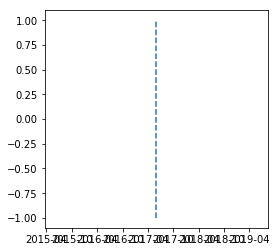

In [10]:
plt.figure(figsize=(4,4))

x = dt.datetime(2017,6,1)
y0 = -1
y1 = 1
#x = 1
print(x,y0,y1)
plt.plot([x,x],[y0,y1],'--',alpha=1.0)
